### Practicing PCA

In [191]:
import pandas as pd

In [192]:
df = pd.read_csv(r'E:\general\data fsds\mnist_train.csv')

In [193]:
y = df['label']

In [194]:
y

0        5
1        0
2        4
3        1
4        9
        ..
59995    8
59996    3
59997    5
59998    6
59999    8
Name: label, Length: 60000, dtype: int64

In [195]:
x = df.iloc[:,1:]

In [196]:
x.head(2)

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [197]:
from sklearn.neighbors import KNeighborsClassifier

In [198]:
knn = KNeighborsClassifier(weights= 'distance')

In [199]:
knn.fit(x,y)

KNeighborsClassifier(weights='distance')

In [200]:
df2 = pd.read_csv(r'E:\general\data fsds\mnist_test.csv')

In [201]:
x_test = df2.iloc[:,1:]

In [202]:
y_test = df2.iloc[:,0]

In [203]:
y_pred = knn.predict(x_test)

KeyboardInterrupt: 

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test,y_pred)

0.9691

### Practicing MLR 

In [ ]:
from sklearn.datasets import make_regression
import pandas as pd
import numpy as np

from sklearn.metrics import mean_absolute_error, mean_squared_error , r2_score 

In [ ]:
X, y = make_regression(100,2, n_informative=2, n_targets = 1, noise = 50)

In [ ]:
df = pd.DataFrame({'feature1': X[:,0] , 'feature2': X[:,1], 'target' : y })

In [ ]:
df.iloc[[0]]

,feature1,feature2,target
0,0.601556,0.904823,170.097697


In [ ]:
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
px.scatter_3d(df, x = 'feature1', y= 'feature2', z='target')

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test , y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 3)

In [ ]:
from sklearn.linear_model import LinearRegression 

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred = lr.predict(x_test)

In [ ]:
print('MAE' , mean_absolute_error(y_test, y_pred))
print('MSE', mean_squared_error(y_test, y_pred))
print('R2 score', r2_score(y_test, y_pred))

MAE 44.17920590091025
MSE 3003.216385637218
R2 score 0.7888311193835559


### Linear Regression Using OLS method

In [2]:
import numpy as np

In [3]:
class MyLR():
    def __init__(self):
        self.coeff = None
        self.inter = None
        self.betas = None
        
    def fit(self, x_train, y_train):
        #print(x_train.ndim)
        if x_train.ndim == 1:
            x_train= x_train.reshape(x_train.size,1)
        
        x_train = np.insert(x_train,0,1,1)
        self.betas = np.dot(np.dot(x_train.T,y_train),np.linalg.inv(np.dot(x_train.T,x_train)))
        self.coeff = self.betas[1:]
        self.inter = self.betas[0]

    def predict(self, x_test):
        print(x_test.ndim)
        if x_test.ndim ==1:
            x_test = x_test.reshape(x_test.size,1)
        pred = np.dot(x_test, self.coeff)
        return pred+self.inter


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
x = np.arange(0,100).reshape(50,2)

In [15]:
obj = MyLR()

In [24]:
x_train = np.array([[2],[4]]) 
y_train = np.array([5,10])
obj.fit(x_train,y_train) 
obj.coeff

array([2.5])

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test = train_test_split(x[:,0],x[:,1],test_size = .2)

In [ ]:
obj.fit(x_train,y_train)

In [ ]:
obj.predict(x_test)

1


array([25., 11., 77., 87., 43., 19.,  1., 59., 17., 69.])

In [ ]:
y_test

array([25, 11, 77, 87, 43, 19,  1, 59, 17, 69])

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv(r'e:\general\data fsds\Iris.csv')

In [ ]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:,:3],df['petal_width'], test_size = 0.2)

In [ ]:
x_train.shape

(120, 3)

In [ ]:
lr = MyLR()

### Gradient Descent 

In [ ]:
import numpy as np

In [ ]:
from sklearn.datasets import make_regression


In [ ]:
X, y = make_regression(4,1,noise=4)

In [ ]:
import matplotlib.pyplot as plt

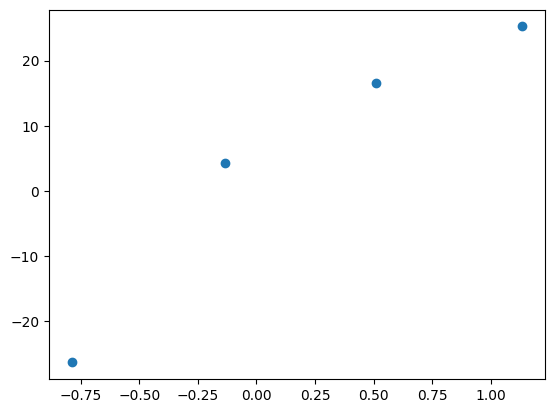

In [ ]:
plt.scatter(X,y)

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [ ]:
lr.fit(X,y)

LinearRegression()

In [ ]:
lr.coef_

array([26.11375296])

In [ ]:
slope = 26.114

In [ ]:
class GDA():
    def __init__(self) -> None:
        self.coef_ = 26.114
        self.intercept_ = 0
        
    def fit(self,x,y, learning_rate : float = 0.01, epochs:int=10):
        for i in range(epochs):
            self.intercept_ = self.intercept_ + learning_rate* (2 * np.sum((y , (-1)*self.coef_*x.ravel()-self.intercept_ )))
            
        print(self.intercept_)
            

In [ ]:
Gd = GDA()

In [ ]:
Gd.fit(X,y,epochs=100)

0.21262444265872754


In [ ]:
lr.intercept_

0.21269105283153866

### For Both m and b

In [ ]:
class GDA():
    def __init__(self) -> None:
        self.coef_ = 900
        self.intercept_ = 0
        
    def fit(self,x,y, learning_rate : float = 0.01, epochs:int=10):
        for i in range(epochs):
            #self.intercept_ = self.intercept_ + learning_rate* (2 * np.sum((y , (-1)*self.coef_*x.ravel()-self.intercept_ )))
            #self.coef_ = self.coef_ + learning_rate* (2 * np.sum((y , (-1)*self.coef_*x.ravel()-self.intercept_ )))
            slope_b = -2 * np.sum((y-self.coef_*x.ravel()-self.intercept_ ))
            slope_m = -2 * np.sum((y - self.coef_*x.ravel() - self.intercept_)*x.ravel())
            self.intercept_ = self.intercept_ - learning_rate* slope_b
            self.coef_ = self.coef_ - learning_rate* slope_m
            
        print(self.intercept_)
        print(self.coef_)
            

In [ ]:
gd = GDA()

In [ ]:
gd.fit(X,y,epochs=1000)

0.2126910528315316
26.113752962477168


In [ ]:
lr.coef_, lr.intercept_

(array([26.11375296]), 0.21269105283153866)

In [ ]:
gd.fit(X,y,epochs=10)

-1842.74642930242
2560.89106246279


In [ ]:
lr.fit(X,y)

LinearRegression()

In [ ]:
lr.coef_

array([26.11375296])

In [ ]:
lr.intercept_

0.21269105283153866

#### GDA from Scratch

In [ ]:
import numpy as np

In [ ]:
class GDA:
    def __init__(self, epoch:int = 10 , lr: int = 0.01 ):
        self.lr = lr
        self.epoch = epoch
        self.intercept_ = 0
        
    def fit(self,x, y):
        x_orig = x.copy()
        n= x.shape[0]
        self.coef_ = np.ones(x.shape[1], int).reshape(x.shape[1],1)
        #print(self.coef_)
        self.coef_ = np.insert(self.coef_,0,0, axis=0)
        #print(self.coef_)

        x = x.T
        x = np.insert(x,0,np.ones(n,int),axis=0)
        
        #--implementing batch gradient descent algorithm
        for i in range(self.epoch):
            print(self.coef_)
            print(x)
            y_hat = -1 * np.dot(self.coef_, x)
            y = y.reshape(len(y),1)
            error = y-y_hat
            grad0 = (2/n)* np.sum(error)
            grads =[]
            for k in range(x_orig.shape[1]):
                gradient = np.sum((2/n)*(error.T * x_orig[:,k]))
                grads.append(gradient)
                
            self.intercept_ = self.intercept_ - self.lr * grad0
            self.coef_ = np.array(grads)
            
        return 'End'


In [ ]:
from sklearn.datasets import load_diabetes

In [553]:
import numpy as np

class GDA:
    def __init__(self, epoch=10, lr=0.01):
        self.lr = lr
        self.epoch = epoch
        self.coef_ = None

    def fit(self, x:np.array=None, y:np.array=None):
        #x input array details n rows ic columns
        n,ic = x.shape
        self.coef_ = np.ones(ic+1).reshape(ic+1,1) #np.random.randint(-200,200,ic+1).reshape(ic+1,1)
        x= np.insert(x,0,1,axis=1)
        #print(x.T)
        #print( self.coef_.T.shape, x.T.shape)
        #y_pred = np.dot(self.coef_.T,x.T).ravel()
        #print(y_pred.shape)
        #print(y.shape)
        #eroor = y-y_pred
        #print(eroor.shape)
        for i in range(self.epoch):
            y_pred = -1 * np.dot(self.coef_.T,x.T).ravel()
            eroor = y-y_pred
            term1 = (2/n)*np.sum(eroor)   
            #print(self.coef_)
            #print(self.coef_[1:].shape)
            #print(x[:,1].shape)
            #print(ic)
            terms = [term1]
            for k in range(1,ic+1):
                term = (2/n)*np.sum(eroor * x[:,k])
                terms.append(term)
                #print(term)
                #self.coef_[k] = term  
            
            #self.coef_  = self.coef_ - (self.lr * np.array(terms))
            self.coef_ = (self.coef_) - ((self.lr * np.array(terms)).reshape(len(terms),1))
            #print(self.coef_)
            #self.coef_ = self.coef_ - self.lr            
            #return y_pred

    def predict(self,x_test:np.array=None):
        n,ic = x_test.shape
        x_test = np.insert(x_test,0,1,axis=1)
        return -1 * np.dot(self.coef_.T,x_test.T).ravel()
        



In [554]:
x,y= load_diabetes(return_X_y=True)

In [555]:
gda = GDA(100,0.01)

In [556]:
gda.fit(x,y)

In [557]:
gda.coef_

array([[-131.8249895 ],
       [  -0.37411575],
       [   0.6873923 ],
       [  -3.28334064],
       [  -2.22617052],
       [  -0.55046508],
       [  -0.27081067],
       [   3.87630814],
       [  -2.13941938],
       [  -3.13259314],
       [  -1.79290082]])

In [449]:
from sklearn.datasets import make_regression

In [450]:
mk = make_regression(100,1)

In [451]:
x, y = mk

In [452]:
gda = GDA()

In [502]:
gda.fit(x,y)

In [558]:
gd1 = GDA(16)

In [559]:
x= [[1,2],[3,4],[5,6]]
y = [2,4,6]
x = np.array(x)
y = np.array(y)
gd1.fit(x,y)

In [560]:
gd1.coef_

array([[ 0.56990822],
       [-0.38611788],
       [-0.81620966]])

In [485]:
from sklearn.linear_model import LinearRegression

In [486]:
lr = LinearRegression()

In [487]:
lr.fit(x,y)

LinearRegression()

In [488]:
lr.coef_

array([0.5, 0.5])

In [492]:
lr.intercept_

0.5000000000000004

In [506]:
x

array([[1, 2],
       [3, 4],
       [5, 6]])

In [562]:
y_pred = gd1.predict(x)

In [563]:
from sklearn.metrics import r2_score

In [564]:
r2_score(y,y_pred)

0.9509914785696507

In [565]:
lr.fit(x,y)

LinearRegression()

In [567]:
r2_score(y,lr.predict(x))

1.0

### Implementing Ridge on Multiple LR

In [4]:
from sklearn.datasets import load_diabetes

In [5]:
x,y = load_diabetes(return_X_y=True)

In [8]:
x.shape

(442, 10)

In [12]:
from sklearn.linear_model import Ridge

In [13]:
ridge = Ridge(alpha=2,solver='cholesky')

In [16]:
from sklearn.model_selection import train_test_split as t

In [19]:
x_train,x_test,y_train,y_test = t(x,y,test_size=0.2)

In [23]:
ridge.fit(x_train,y_train)

Ridge(alpha=2, solver='cholesky')

In [25]:
y_pred = ridge.predict(x_test)

In [26]:
from sklearn.metrics import r2_score

In [27]:
r2_score(y_test,y_pred)

0.3488159630063796

In [29]:
print(ridge.intercept_)
ridge.coef_

150.85376019047635


array([  33.27308596,  -34.99546851,  201.55558028,  132.56416874,
         21.38032931,    2.96997797, -116.45370715,  100.65256034,
        174.77954851,   98.73682555])

#### Creating the above class from scratch

In [6]:
import numpy as np

In [35]:
class MyRidge:
    def __init__(self, alpha=0.1):
        self.alpha = alpha
        self.intercept_ = None
        self.coef_ = None
        
        
    def fit(self, x_train, y_train):
        x_train = np.insert(x_train,0,1,axis=1)
        lamda = np.identity(x_train.shape[1])
        beta = np.linalg.inv(np.dot(x_train.T,x_train) + self.alpha*lamda).dot(x_train.T).dot(y_train)
        self.intercept_ = beta[0]
        self.coef_ = beta[1:]
    
    def predict(self, x_test):
        pass

In [36]:
myridge = MyRidge(2)

In [37]:
myridge.fit(x_train,y_train)

In [ ]:
myridge.coef_

In [39]:
myridge.intercept_

150.00334149588838

### implementation of perceptron 

In [19]:
import numpy as np
from sklearn.datasets import make_classification
class perceptron:
    def __init__(self, a=1, b=1, c=1):
        self.w0 = c
        self.w1 = a
        self.w2 = b
        
    
    def classifier(self, k):
        if k<=0:
            return 0
        else: return 1
        
    def fit(self, x_train, y_train,learning_rate = 0.01):
        #run a loop 1000 times 
        x_train = np.insert(x_train,0,1,axis=1)
        # y_hhat = np.dot(x_train,np.array([self.w0, self.w1, self.w2]))
        # ind =0
        # for i in y_hhat:
        #     y_hhat[ind]= self.classifier(i)
        #     ind +=1
        count = 0   
        for i in range(1000):    
            rand_point = np.random.randint(0,y_train.size)
            y_hhat = np.dot(x_train[rand_point],np.array([self.w0, self.w1, self.w2]))
            y_hhat = self.classifier(y_hhat)
            
            # count = 0
            if y_hhat - y_train[rand_point] != 0:
                t = y_hhat - y_train[rand_point]
                self.w0 = self.w0 + t*learning_rate*x_train[rand_point][0]
                self.w1 = self.w1 + t*learning_rate*x_train[rand_point][1]
                self.w2 = self.w2 + t*learning_rate*x_train[rand_point][2]
                count+=1
            
        print(count)
        
        # return y_hhat
        
        
        for i in range(1000):
            #y_hat = np.dot(x_train)
            pass
            
        
        
        

In [20]:
per = perceptron()

In [4]:
from sklearn.datasets import make_classification

In [33]:
mc = make_classification(n_features=2, n_informative=2,n_redundant=0, class_sep=3)

In [34]:
import matplotlib.pyplot as plt

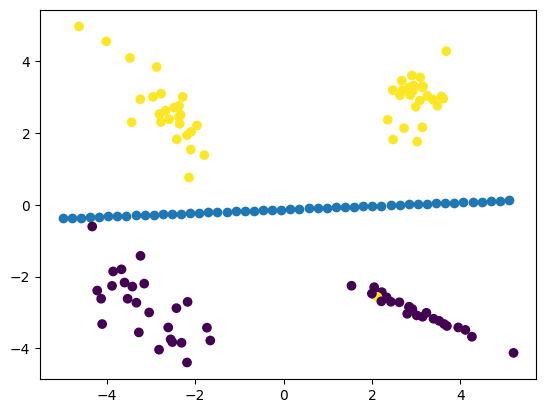

In [78]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_classification
mc = make_classification(n_features=2, n_informative=2,n_redundant=0, class_sep=3)
# plt.scatter(x_data,y_data)
plt.scatter(mc[0][:,0],mc[0][:,1], c=mc[1])

In [21]:
per.fit(mc[0],mc[1])

714


In [22]:
per.w0

1.1

In [23]:
per.w1

10.200504496397008

In [24]:
per.w2

-20.251992250026124

In [69]:
m= (per.w0/per.w2)*-1

In [71]:
b = (per.w0/per.w1)*-1

In [73]:
x_data = np.linspace(-5,5.100)

In [74]:
y_data = m*x_data + b

array([-0.37569174, -0.36556518, -0.35543862, -0.34531207, -0.33518551,
       -0.32505895, -0.3149324 , -0.30480584, -0.29467929, -0.28455273,
       -0.27442617, -0.26429962, -0.25417306, -0.2440465 , -0.23391995,
       -0.22379339, -0.21366683, -0.20354028, -0.19341372, -0.18328717,
       -0.17316061, -0.16303405, -0.1529075 , -0.14278094, -0.13265438,
       -0.12252783, -0.11240127, -0.10227472, -0.09214816, -0.0820216 ,
       -0.07189505, -0.06176849, -0.05164193, -0.04151538, -0.03138882,
       -0.02126227, -0.01113571, -0.00100915,  0.0091174 ,  0.01924396,
        0.02937052,  0.03949707,  0.04962363,  0.05975019,  0.06987674,
        0.0800033 ,  0.09012985,  0.10025641,  0.11038297,  0.12050952])

### Approach 2nd Using Sigmoid function instead of step function

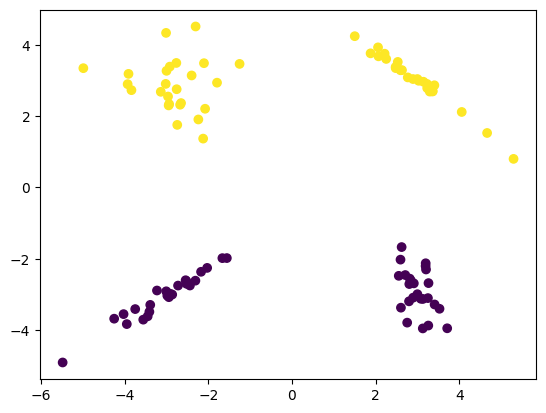

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_classification
mc = make_classification(n_features=2, n_informative=2,n_redundant=0, class_sep=3)
plt.scatter(mc[0][:,0],mc[0][:,1], c=mc[1])
import math

In [14]:
class SigmoidApplier():
    
    def __init__(self) -> None:
         self.w0 = 0
         self.w1 = 1
         self.w2 = 2
    
    
    def fit(self, x_train, y_train, learning_rate=0.01):
        x_train = np.insert(x_train,0,1,axis=1)
        count = 0   
        for i in range(1000):    
            rand_point = np.random.randint(0,y_train.size)
            y_hhat = np.dot(x_train[rand_point],np.array([self.w0, self.w1, self.w2]))
            y_hhat = self.sigmafication(y_hhat)
            
            # count = 0
            if y_hhat - y_train[rand_point] != 0:
                t = y_hhat - y_train[rand_point]
                self.w0 = self.w0 + t*learning_rate*x_train[rand_point][0]
                self.w1 = self.w1 + t*learning_rate*x_train[rand_point][1]
                self.w2 = self.w2 + t*learning_rate*x_train[rand_point][2]
                count+=1
        
    def sigmafication(self, val):
            return 1/(1+(math.exp(1)**-val))
            
            
            

In [15]:
v2_per = SigmoidApplier()

In [16]:
v2_per.fit(mc[0],mc[1])

In [27]:
m= (per.w0/per.w2)*-1
b = (per.w0/per.w1)*-1
x_data = np.linspace(-5,5.100)
y_data = m*x_data + b

In [29]:
m2= (v2_per.w0/v2_per.w2)*-1
b2 = (v2_per.w0/v2_per.w1)*-1
x_data2 = np.linspace(-5,5.100)
y_data2 = m2*x_data2 + b2

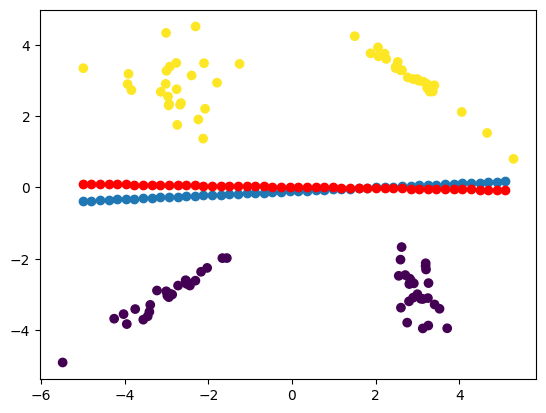

In [31]:
plt.scatter(x_data,y_data)
plt.scatter(x_data2,y_data2, c='r')
plt.scatter(mc[0][:,0],mc[0][:,1], c=mc[1])

### Working on DT Algorithm

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split as splitt
from sklearn.model_selection import cross_val_score

In [3]:
x,y = load_wine(return_X_y=True)

In [5]:
x.shape

(178, 13)

In [10]:
np.unique(y)

array([0, 1, 2])

In [12]:
x_train, x_test, y_train , y_test = splitt(x,y, test_size=0.20)

In [15]:
import pandas as pd
import numpy as np
from faker import Faker
from datetime import date, timedelta

# Set up Faker for generating fake data
fake = Faker()

# Set a seed for reproducibility
np.random.seed(42)

# Number of samples
num_samples = 1000

# Generate synthetic cancer patient data
data = {
    'Patient_ID': [fake.uuid4() for _ in range(num_samples)],
    'Name': [fake.name() for _ in range(num_samples)],
    'Gender': [fake.random_element(elements=('Male', 'Female')) for _ in range(num_samples)],
    'Birthdate': [fake.date_of_birth(minimum_age=30, maximum_age=80).isoformat() for _ in range(num_samples)],
    'Diagnosis': [fake.random_element(elements=('Breast Cancer', 'Lung Cancer', 'Prostate Cancer', 'Colon Cancer')) for _ in range(num_samples)],
    'Stage': [fake.random_element(elements=('Stage I', 'Stage II', 'Stage III', 'Stage IV')) for _ in range(num_samples)],
    'Treatment': [fake.random_element(elements=('Surgery', 'Chemotherapy', 'Radiation Therapy', 'Immunotherapy')) for _ in range(num_samples)],
    'Last_Checkup': [fake.date_between(start_date='-1y', end_date='today').isoformat() for _ in range(num_samples)],
    'Smoker': [fake.random_element(elements=('Yes', 'No')) for _ in range(num_samples)],
    'Family_History': [fake.random_element(elements=('Yes', 'No')) for _ in range(num_samples)],
    'Blood_Pressure': [fake.random_int(min=90, max=140) for _ in range(num_samples)],
    'Cholesterol': [fake.random_int(min=120, max=240) for _ in range(num_samples)],
    'BMI': [fake.random.uniform(18, 30) for _ in range(num_samples)],
}

# Create DataFrame
cancer_data = pd.DataFrame(data)

# Display the synthetic dataset
print(cancer_data.head())


                             Patient_ID             Name  Gender   Birthdate  \
0  c8e05afc-e9cc-4f05-a68c-051ea618881c   Lauren Randall  Female  1943-11-20   
1  6e73bf59-0b6a-4fa0-994b-f1ecf146324b     Karen Turner    Male  1967-07-22   
2  533fecef-c6ce-4371-beda-b405189b7f79        Tina Wolf  Female  1966-10-27   
3  b58601bc-93eb-4c29-bac3-e6f12a0742b0  Derek Macdonald    Male  1993-05-23   
4  21a88583-920a-4587-a37c-1a7b8f6e4e27     Kristin Hall  Female  1943-12-25   

      Diagnosis      Stage      Treatment Last_Checkup Smoker Family_History  \
0  Colon Cancer   Stage IV  Immunotherapy   2023-03-19     No             No   
1  Colon Cancer  Stage III  Immunotherapy   2023-04-23     No             No   
2   Lung Cancer   Stage II        Surgery   2023-04-06    Yes            Yes   
3   Lung Cancer   Stage IV   Chemotherapy   2023-11-13    Yes             No   
4  Colon Cancer   Stage IV        Surgery   2023-08-03    Yes             No   

   Blood_Pressure  Cholesterol        

In [26]:
cancer_data.Smoker.value_counts()

No     503
Yes    497
Name: Smoker, dtype: int64

In [27]:
cancer_data.Gender.value_counts()

Male      507
Female    493
Name: Gender, dtype: int64

In [29]:
df = pd.read_csv(r'E:\general\data fsds\Disease_symptom_and_patient_profile_dataset.csv')

In [32]:
df['Disease'].value_counts()

Asthma                            23
Stroke                            16
Osteoporosis                      14
Hypertension                      10
Diabetes                          10
                                  ..
Autism Spectrum Disorder (ASD)     1
Hypoglycemia                       1
Fibromyalgia                       1
Eating Disorders (Anorexia,...     1
Williams Syndrome                  1
Name: Disease, Length: 116, dtype: int64

### Adaboost learning using small dataset

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier,plot_tree
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
x1 = [0,6,4,7]
x2 = [1,3,2,1]
label = [0,0,1,1]
data = {'x1':x1, 'x2':x2, 'label': label}
df = pd.DataFrame(data)
df

,x1,x2,label
0,0,1,0
1,6,3,0
2,4,2,1
3,7,1,1


In [3]:
dt = DecisionTreeClassifier(max_depth=1)
dt.fit(df[['x1','x2']], df['label'])

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[0] <= 2.0\ngini = 0.5\nsamples = 4\nvalue = [2, 2]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.75, 0.25, 'gini = 0.444\nsamples = 3\nvalue = [1, 2]')]

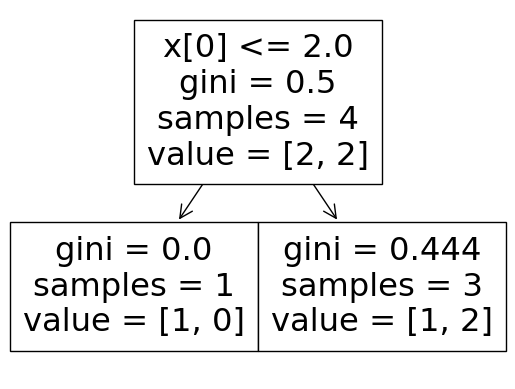

In [4]:
plot_tree(dt)

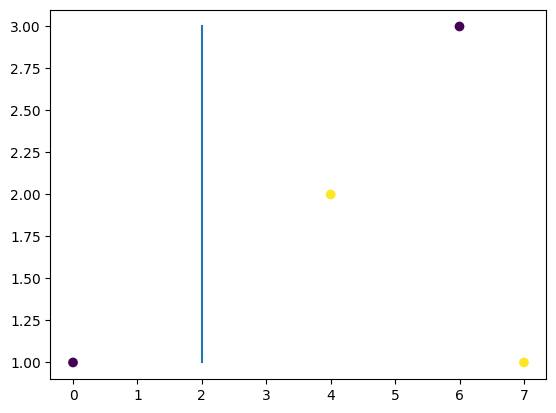

In [7]:
plt.scatter(df[['x1']],df['x2'], c=df['label'])
plt.plot([2,2],[1,3])

In [9]:
#assign weights to each row
df['weights'] = [1/df.shape[0]]*df.shape[0]

In [10]:
df

,x1,x2,label,weights
0,0,1,0,0.25
1,6,3,0,0.25
2,4,2,1,0.25
3,7,1,1,0.25


In [11]:
y_pred = dt.predict(df[['x1','x2']])

In [12]:
df['pred'] = y_pred

In [13]:
df

,x1,x2,label,weights,pred
0,0,1,0,0.25,0
1,6,3,0,0.25,1
2,4,2,1,0.25,1
3,7,1,1,0.25,1


In [14]:
#error = sum of misclassified weights = 0.25
error1 = 0.25
import math
# therefore alpha = 0.5 times ln((1-error)/error)
alpha1= 0.5 * math.log((1-error1)/error1)



In [45]:
alpha1

0.5493061443340549

In [16]:
# update weights by this : increase weights of misclassifieds and decrease the 
# correct classifieds row weights so that later we can do upsampling
# new_weight = weight * e^alpha
def update_row_weights(row,alpha=0.55):
  if row['label'] == row['pred']:
    return row['weights'] * math.exp(-alpha)
  else:
    return row['weights'] * math.exp(alpha)

In [46]:
df['updated_weights'] = df.apply(update_row_weights,axis=1)

In [47]:
df

,x1,x2,label,weights,pred,updated_weights
0,0,1,0,0.25,0,0.144237
1,6,3,0,0.25,1,0.433313
2,4,2,1,0.25,1,0.144237
3,7,1,1,0.25,1,0.144237


In [78]:
# normalize the updated weights since there sum is not = 1

In [49]:
df['updated_weights'].sum()

0.8660256122522139

In [48]:
df['normalized'] =  df['updated_weights']/df['updated_weights'].sum()

In [50]:
df

,x1,x2,label,weights,pred,updated_weights,normalized
0,0,1,0,0.25,0,0.144237,0.166551
1,6,3,0,0.25,1,0.433313,0.500347
2,4,2,1,0.25,1,0.144237,0.166551
3,7,1,1,0.25,1,0.144237,0.166551


In [51]:
df['range'] = df['normalized'].cumsum()

In [52]:
df

,x1,x2,label,weights,pred,updated_weights,normalized,range
0,0,1,0,0.25,0,0.144237,0.166551,0.166551
1,6,3,0,0.25,1,0.433313,0.500347,0.666898
2,4,2,1,0.25,1,0.144237,0.166551,0.833449
3,7,1,1,0.25,1,0.144237,0.166551,1.000000


In [53]:
df['low_range'] = df['range']-df['normalized']

In [54]:
df.drop('range',axis=1,inplace=True)
df['high_range'] = df['normalized'].cumsum()

In [55]:
df

,x1,x2,label,weights,pred,updated_weights,normalized,low_range,high_range
0,0,1,0,0.25,0,0.144237,0.166551,0.000000,0.166551
1,6,3,0,0.25,1,0.433313,0.500347,0.166551,0.666898
2,4,2,1,0.25,1,0.144237,0.166551,0.666898,0.833449
3,7,1,1,0.25,1,0.144237,0.166551,0.833449,1.000000


In [19]:
import numpy as np

In [56]:
np.random.random(4)

array([0.66347515, 0.53895868, 0.83708381, 0.80852285])

In [73]:
df2 = df.iloc[[1,1,3,2]]
df2_train = df2[['x1','x2','label']]
df2

,x1,x2,label,weights,pred,updated_weights,normalized,low_range,high_range
1,6,3,0,0.25,1,0.433313,0.500347,0.166551,0.666898
1,6,3,0,0.25,1,0.433313,0.500347,0.166551,0.666898
3,7,1,1,0.25,1,0.144237,0.166551,0.833449,1.000000
2,4,2,1,0.25,1,0.144237,0.166551,0.666898,0.833449


In [74]:
dt2 = DecisionTreeClassifier(max_depth=1)

In [75]:
dt2.fit(df2_train.drop('label',axis=1),df2_train['label'])

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[1] <= 2.5\ngini = 0.5\nsamples = 4\nvalue = [2, 2]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]')]

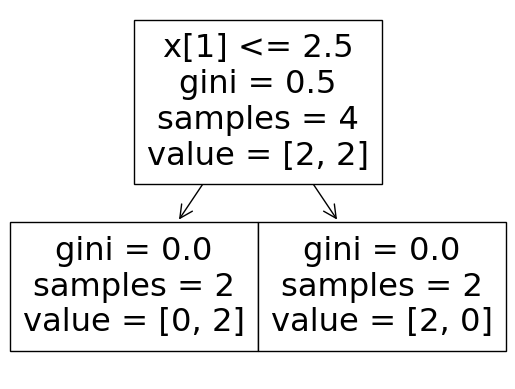

In [76]:
plot_tree(dt2)

In [ ]:
# error = 0
# alpha2 = 1

# the final prediction will be 
# Sign(alpha1*h1(query) + alpha2*h2(query))

In [ ]:
# let's say i have query = 22, 32

# h1(query) = 1
# h2(query) = 1

# Sign(0.55*1 + 1*1)